<a href="https://colab.research.google.com/github/Domtai-cmd/Kiprop/blob/main/Untitled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Numerical derivative of x^2 at x=2: 4.000000000026205
Numerical integration of x^2 from 0 to 1: 0.33333333333333337
Curve fitting coefficients: [ 0.08703704 -0.81349206  1.69312169 -0.03968254]
Linear regression: slope=-0.3028571428571429, intercept=0.7571428571428572


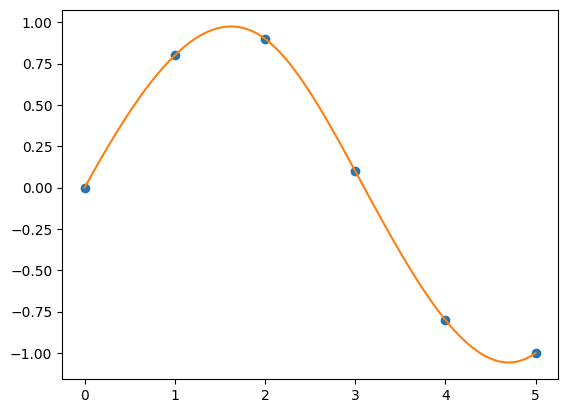

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, interpolate

# Differentiation
def numerical_differentiation(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

# Example usage
def f(x):
    return x**2

x = 2
print(f"Numerical derivative of x^2 at x=2: {numerical_differentiation(f, x)}")

# Numerical integration
def f(x):
    return x**2

result, error = integrate.quad(f, 0, 1)
print(f"Numerical integration of x^2 from 0 to 1: {result}")

# Curve Fitting
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 0.8, 0.9, 0.1, -0.8, -1])
coeffs = np.polyfit(x, y, 3)
poly = np.poly1d(coeffs)

print("Curve fitting coefficients:", coeffs)

# Linear Regression
from sklearn.linear_model import LinearRegression

X = x.reshape(-1, 1)
model = LinearRegression().fit(X, y)
print(f"Linear regression: slope={model.coef_[0]}, intercept={model.intercept_}")

# Spline Interpolation
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 0.8, 0.9, 0.1, -0.8, -1])
f = interpolate.interp1d(x, y, kind='cubic')

x_new = np.linspace(0, 5, 100)
y_new = f(x_new)

plt.plot(x, y, 'o', x_new, y_new, '-')
plt.show()

In [ ]:

def f(x):
    return x**2 - x - 2

def bisection(f, a, b, iterations):
    for i in range(iterations):
        c = (a + b) / 2
        if f(c) == 0:
            return c
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c
        print(f"Iteration {i+1}: x ≈ {c}")
    return (a + b) / 2

root = bisection(f, 1, 3, 3)
print(f"Approximate root after 3 iterations: {root}")

Approximate root after 3 iterations: 2.0


In [ ]:

import numpy as np

x = np.array([2.00, 4.25, 5.25, 7.81, 9.20, 10.60])
y = np.array([7.2, 7.1, 6.0, 5.0, 3.5, 5.0])

def linear_interpolation(x, y, x_interp):
    i = np.searchsorted(x, x_interp) - 1
    return y[i] + (y[i+1] - y[i]) * (x_interp - x[i]) / (x[i+1] - x[i])

y_interp = linear_interpolation(x, y, 4.0)
print(f"Interpolated y value at x = 4.0: {y_interp}")

Interpolated y value at x = 4.0: 7.111111111111111


In [7]:

def f(x):
    return 1.0 - 9.9331650 * x + 1.5 * x**2 - (1/3) * x**3

def f_prime(x):
    return -9.9331650 + 3 * x - x**2

def newton_method(x0, iterations):
    x = x0
    for i in range(iterations):
        x_new = x - f(x) / f_prime(x)
        error = abs((x_new - x) / x_new)
        print(f"Iteration {i+1}: x = {x_new}, Error = {error}")
        x = x_new
    return x

# Starting with an initial guess of 1.0
root = newton_method(1.0, 3)
print(f"Estimated depth: {root} meters")

Iteration 1: x = 0.02100884913734513, Error = 46.59899000000002
Iteration 2: x = 0.10124472340842901, Error = 0.7924943796567667
Iteration 3: x = 0.10221459591498423, Error = 0.00948859111434442
Estimated depth: 0.10221459591498423 meters


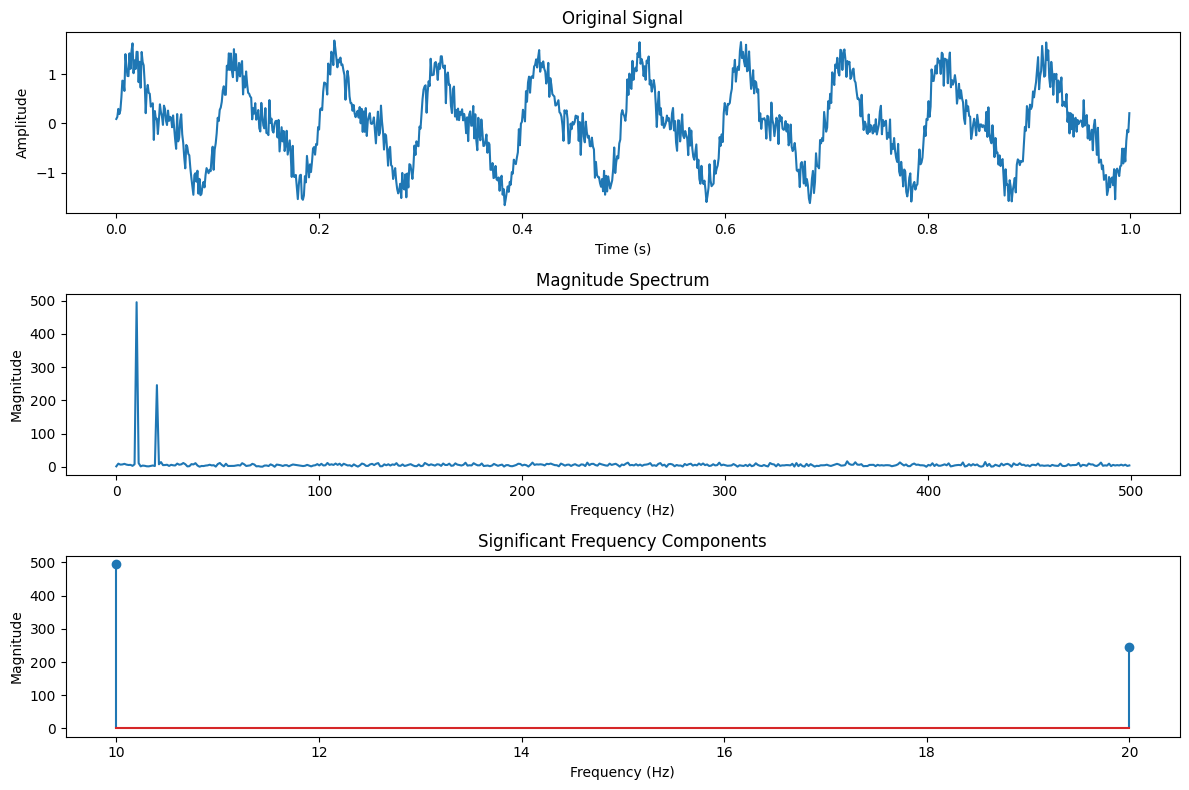

Significant frequency components:
Frequency: 10.00 Hz, Magnitude: 495.21
Frequency: 20.00 Hz, Magnitude: 245.84


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def analyze_fft(signal, sample_rate):
    """
    Compute the FFT of a signal and analyze its frequency components.

    Parameters:
    signal (array): The input signal
    sample_rate (float): The sampling rate of the signal in Hz

    Returns:
    None (displays plots)
    """
    # Compute the FFT
    fft_result = np.fft.fft(signal)

    # Compute the frequency axis
    n = len(signal) hi
    freq_axis = np.fft.fftfreq(n, d=1/sample_rate)

    # Compute the magnitude spectrum
    magnitude_spectrum = np.abs(fft_result)

    # Plot the original signal
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    time_axis = np.arange(n) / sample_rate
    plt.plot(time_axis, signal)
    plt.title('Original Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Plot the magnitude spectrum
    plt.subplot(3, 1, 2)
    plt.plot(freq_axis[:n//2], magnitude_spectrum[:n//2])
    plt.title('Magnitude Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')

    # Find and plot significant frequency components
    threshold = 0.1 * np.max(magnitude_spectrum[:n//2])
    significant_freq = freq_axis[:n//2][magnitude_spectrum[:n//2] > threshold]
    significant_mag = magnitude_spectrum[:n//2][magnitude_spectrum[:n//2] > threshold]

    plt.subplot(3, 1, 3)
    plt.stem(significant_freq, significant_mag)
    plt.title('Significant Frequency Components')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')

    plt.tight_layout()
    plt.show()

    print("Significant frequency components:")
    for freq, mag in zip(significant_freq, significant_mag):
        print(f"Frequency: {freq:.2f} Hz, Magnitude: {mag:.2f}")

# Example usage
if __name__ == "__main__":
    # Generate a sample signal
    t = np.linspace(0, 1, 1000)
    sample_rate = 1000  # Hz
    signal = np.sin(2 * np.pi * 10 * t) + 0.5 * np.sin(2 * np.pi * 20 * t) + 0.2 * np.random.randn(len(t))

    analyze_fft(signal, sample_rate)

In [ ]:

import numpy as np

def trapezoidal_rule(f, a, b, n):
    x = np.linspace(a, b, n+1)
    y = f(x)
    return (b-a)/n * (0.5*y[0] + 0.5*y[-1] + np.sum(y[1:-1]))

# Example usage
def f(x):
    return x**2

a, b = 0, 1  # integration limits
n = 100  # number of trapezoids

result = trapezoidal_rule(f, a, b, n)
print(f"Integral of x^2 from 0 to 1: {result}")

Integral of x^2 from 0 to 1: 0.33335000000000004


In [2]:

import numpy as np

def trapezoidal_rule(f, a, b, n):
    x = np.linspace(a, b, n+1)
    y = f(x)
    return (b-a)/n * (0.5*y[0] + 0.5*y[-1] + np.sum(y[1:-1]))

# Example usage
def f(x):
    return x**2

a, b = 0, 1  # integration limits
n = 100  # number of trapezoids

result = trapezoidal_rule(f, a, b, n)
print(f"Integral of x^2 from 0 to 1: {result}")

Integral of x^2 from 0 to 1: 0.33335000000000004


In [3]:

def newton_divided_difference(x, y):
    n = len(x)
    coef = np.zeros([n, n])
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])

    def P(x_val):
        n = len(x)
        p = coef[0][0]
        for i in range(1, n):
            term = coef[0][i]
            for j in range(i):
                term *= (x_val - x[j])
            p += term
        return p

    return P

# Given data points
x = [1, 2, 3, 4]
y = [1, 4, 9, 16]

newton_poly = newton_divided_difference(x, y)

# Test the polynomial
x_test = 2.5
print(f"Newton's Divided Difference at x = {x_test}: {newton_poly(x_test)}")

Newton's Divided Difference at x = 2.5: 6.25


In [ ]:
import numpy as np

def power_iteration(A, num_iterations=1000, tolerance=1e-8):
    n = A.shape[0]
    v = np.random.rand(n)
    v = v / np.linalg.norm(v)

    for _ in range(num_iterations):
        Av = A.dot(v)
        eigenvalue = v.dot(Av)
        new_v = Av / np.linalg.norm(Av)

        if np.allclose(v, new_v, atol=tolerance):
            return eigenvalue, new_v
        v = new_v

    return eigenvalue, v

A = np.array([[4, 1, 1],
              [1, 3, -1],
              [1, -1, 2]])

eigenvalue, eigenvector = power_iteration(A)
print("Power Iteration Method:")
print(f"Dominant Eigenvalue: {eigenvalue}")
print(f"Corresponding Eigenvector: {eigenvector}")

Power Iteration Method:
Dominant Eigenvalue: 4.67513087046697
Corresponding Eigenvector: [0.88764869 0.42713753 0.17214338]


In [ ]:

def qr_algorithm(A, num_iterations=1000):
    n = A.shape[0]
    Q = np.eye(n)

    for _ in range(num_iterations):
        Q_k, R_k = np.linalg.qr(A)
        A = R_k.dot(Q_k)
        Q = Q.dot(Q_k)

    eigenvalues = np.diag(A)
    eigenvectors = Q

    return eigenvalues, eigenv in HBectors

eigenvalues, eigenvectors = qr_algorithm(A)
print("\nQR Algorithm:")
print(f"Eigenvalues: {eigenvalues}")
print("Eigenvectors:")
print(eigenvectors)


QR Algorithm:
Eigenvalues: [4.67513087 3.53918887 0.78568026]
Eigenvectors:
[[ 0.88765034 -0.23319198 -0.39711255]
 [ 0.42713229  0.73923874  0.52065737]
 [ 0.17214786 -0.63178128  0.75578934]]


In [ ]:
print("\nComparison with NumPy's eig function:")
np_eigenvalues, np_eigenvectors = np.linalg.eig(A)
print(f"NumPy Eigenvalues: {np_eigenvalues}")
print("NumPy Eigenvectors:")
print(np_eigenvectors)


Comparison with NumPy's eig function:
NumPy Eigenvalues: [0.78568026 4.67513087 3.53918887]
NumPy Eigenvectors:
[[-0.39711255  0.88765034  0.23319198]
 [ 0.52065737  0.42713229 -0.73923874]
 [ 0.75578934  0.17214786  0.63178128]]


In [ ]:
import numpy as np

def gradient_descent(learning_rate=0.1, max_iterations=1000, tolerance=1e-6):
    # Initial guess
    x, y = 0, 0

    for i in range(max_iterations):
        # Compute gradients
        grad_x = 2*x - y + 1
        grad_y = 2*y - x - 1

        # Update x and y
        new_x = x - learning_rate * grad_x
        new_y = y - learning_rate * grad_y

        # Check for convergence
        if np.abs(new_x - x) < tolerance and np.abs(new_y - y) < tolerance:
            break

        x, y = new_x, new_y

    return x, y, f(x, y)

def f(x, y):
    return x**2 + y**2 - x*y + x - y + 1

# Run the gradient descent
x_min, y_min, f_min = gradient_descent()
print(f"Minimum found at x = {x_min:.6f}, y = {y_min:.6f}")
print(f"Minimum value of f(x,y) = {f_min:.6f}")

Minimum found at x = -0.333331, y = 0.333331
Minimum value of f(x,y) = 0.666667


In [ ]:

def myfunc2(x, a, b, c):
    return a * x**2 + b * x + c

for n in range(1, 6):  # This will iterate from 1 to 5
    x = n * 0.1
    z = myfunc2(x, 2, 3, 7)
    print(f'x={x:4.2f}  f(x)={z:8.4f}')

x=0.10  f(x)=  7.3200
x=0.20  f(x)=  7.6800
x=0.30  f(x)=  8.0800
x=0.40  f(x)=  8.5200
x=0.50  f(x)=  9.0000


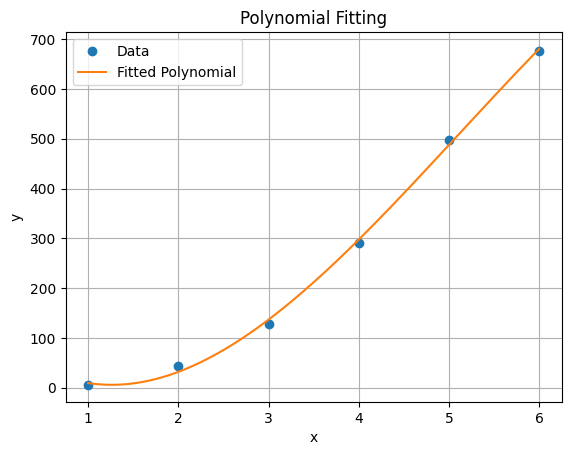

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Given data points
x = [1, 2, 3, 4, 5, 6]
y = [5.5, 43.1, 128.79, 290.4, 498.3, 676.7]

# Fit a polynomial of degree 3
p = np.polyfit(x, y, 3)

# Evaluate the polynomial at points x
x2 = np.linspace(min(x), max(x), 1000)
y2 = np.polyval(p, x2)

# Plot the original data points and the fitted polynomial
plt.plot(x, y, 'o', label='Data')
plt.plot(x2, y2, label='Fitted Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Fitting')
plt.legend()
plt.grid(True)
plt.show()